In [3]:
#import external pandas_datareader library with alias of web
#import pandas_datareader as web
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

Gets historical data for #nvda

In [4]:
def getHistoricalData(ticker):

    tickr = yf.Ticker(ticker)
    tickrHist = tickr.history(start="2020-01-01", end="2023-01-01")
    print(tickrHist.head())

    tickrHist.to_csv(f'{ticker}.csv')
    return tickr



In [5]:
ticker = getHistoricalData('SPY')
print(ticker.info)

                                 Open        High         Low       Close  \
Date                                                                        
2020-01-02 00:00:00-05:00  306.117275  307.394582  305.161654  307.375641   
2020-01-03 00:00:00-05:00  303.865470  306.211931  303.808703  305.048157   
2020-01-06 00:00:00-05:00  303.231519  306.297064  303.108515  306.211914   
2020-01-07 00:00:00-05:00  305.625254  306.117270  304.887258  305.350891   
2020-01-08 00:00:00-05:00  305.549607  308.236668  305.294157  306.978302   

                             Volume  Dividends  Stock Splits  Capital Gains  
Date                                                                         
2020-01-02 00:00:00-05:00  59151200        0.0           0.0            0.0  
2020-01-03 00:00:00-05:00  77709700        0.0           0.0            0.0  
2020-01-06 00:00:00-05:00  55653900        0.0           0.0            0.0  
2020-01-07 00:00:00-05:00  40496400        0.0           0.0          

In [6]:
data = yf.download('SPY AAPL')
data.tail()

[*********************100%%**********************]  2 of 2 completed


Adj Close                   Close                    High  \
                  AAPL         SPY        AAPL         SPY        AAPL   
Date                                                                     
2023-08-22  177.229996  438.149994  177.229996  438.149994  177.679993   
2023-08-23  181.119995  443.029999  181.119995  443.029999  181.550003   
2023-08-24  176.380005  436.890015  176.380005  436.890015  181.100006   
2023-08-25  178.610001  439.970001  178.610001  439.970001  179.149994   
2023-08-28  180.190002  442.760010  180.190002  442.760010  180.589996   

                               Low                    Open              \
                   SPY        AAPL         SPY        AAPL         SPY   
Date                                                                     
2023-08-22  441.179993  176.250000  437.570007  177.059998  441.179993   
2023-08-23  443.670013  178.330002  439.100006  178.520004  439.250000   
2023-08-24  445.220001  176.009995  436.859985  180.669998  444.690002   
2023-08-25  441.299988  175.820007  435.000000  177.380005  438.679993   
2023-08-28  443.399994  178.550003  439.970001  180.089996  442.239990   

              Volume               
                AAPL          SPY  
Date                               
2023-08-22  42084200   65062900.0  
2023-08-23  52722800   68441000.0  
2023-08-24  54945800   88517300.0  
2023-08-25  51418700  102297000.0  
2023-08-28  43769700   61524300.0

<Axes: xlabel='Date'>

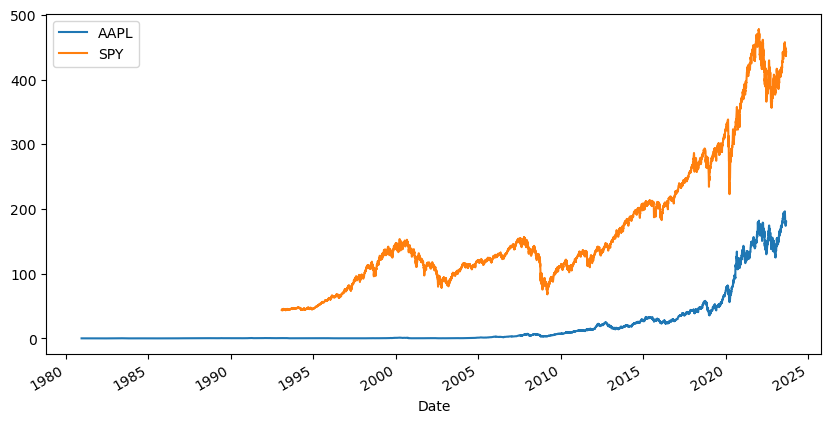

In [7]:
data['Close'].plot(figsize=(10, 5))

In [8]:
# Create a function to generate trading signals

#The Bollinger Bands are then calculated by subtracting the rolling mean from the stock's close price, 
#and dividing the result by two times the rolling standard deviation. 
#If the Bollinger Band value is greater than 1, the function generates a sell signal (-1); 
#if the Bollinger Band value is less than -1, the function generates a buy signal (1); 
#otherwise, the function generates a hold signal (0).

def generate_signals(data):
    signals = []
    for i in range(len(data)):
        if data["Bollinger Band"][i] > 1:
            signals.append(-1)
        elif data["Bollinger Band"][i] < -1:
            signals.append(1)
        else:
            signals.append(0)
            
    return signals

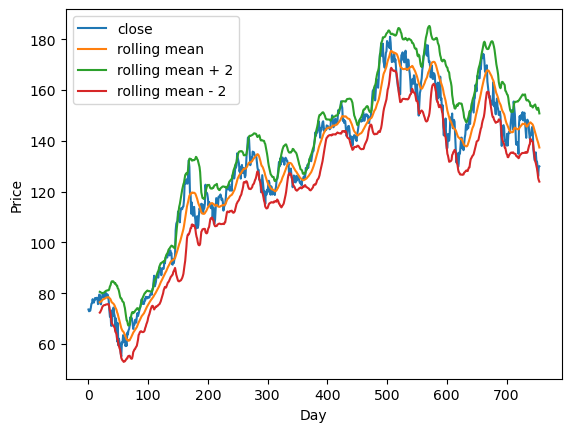

In [31]:
#This strategy is based on the idea that prices will eventually return to their mean, or average, value. 
#The bot will buy when the price is below the average and sell when the price is above the average.

def meanReversionAlg(ticker):
    # Load historical data into a dataframe
    try:
        df = pd.read_csv(f"{ticker}.csv")
    except:
        getHistoricalData(ticker)
        df = pd.read_csv(f"{ticker}.csv")

    # Calculate the rolling mean and standard deviation
    rolling_mean = df["Close"].rolling(window=20).mean()
    rolling_std = df["Close"].rolling(window=20).std()

    # Create a new column for the Bollinger Band
    df["Bollinger Band"] = (df["Close"] - rolling_mean) / (2 * rolling_std)


    # Generate trading signals
    signals = generate_signals(df)
    df["Signals"] = signals

    # Plot the data
    plt.plot(df["Close"], label='close')
    plt.ylabel("Price")
    plt.xlabel("Day")
    plt.plot(rolling_mean, label='rolling mean')
    plt.plot(rolling_mean + 2 * rolling_std, label='rolling mean + 2')
    plt.plot(rolling_mean - 2 * rolling_std, label='rolling mean - 2')
    plt.legend()
    plt.show()
    df["Signals"].to_csv(f"{ticker}_meanrev_signals.csv")
    
    
meanReversionAlg('AAPl')


In [38]:
def plot_momentum_signals(data):
    """
    This function plots the signals compared to the actual data.

    Args:
    data: A pandas DataFrame of historical prices.
    signals: A pandas DataFrame of momentum trading signals.
    """
    
    signals = data["Signals"]

    fig, ax1 = plt.subplots()

    ax1.plot(data["Close"])
    ax1.plot(signals, color="red")

    ax1.set(xlabel="Date", ylabel="Price", title="Momentum Trading Signals")
    ax1.legend(["Close", "Signals"])

    plt.show()
    

In [10]:
# Create a function to generate trading signals

#If RSI value is greater than 70, the function generates a sell signal (-1); 
#if RSI value is less than 30, the function generates a buy signal (1); 
#otherwise, the function generates a hold signal (0).

def generate_RSI_signals(data):
    signals = []
    for i in range(len(data)):
        if data['RSI'][i] > 70:
            signals.append(-1)
        elif data['RSI'][i] < 30:
            signals.append(1)
        else:
            signals.append(0)
    return signals

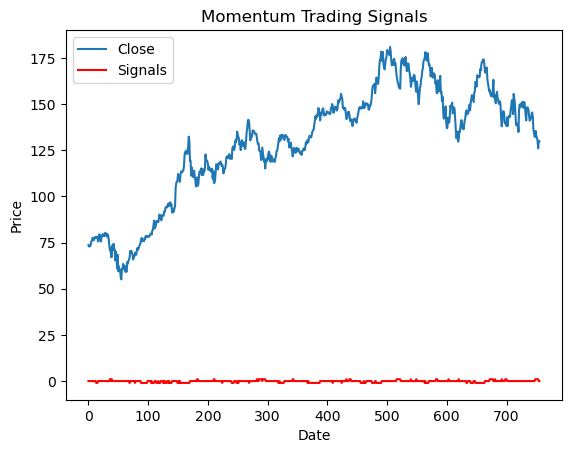

KeyError: 2

In [52]:
#RSI is a momentum indicator that compares the magnitude of recent gains to recent 
#losses in order to determine overbought and oversold conditions of an asset.

def momentumTrading(ticker):
    # Load historical data into a dataframe
    try:
        df = pd.read_csv(f"{ticker}.csv")
    except:
        getHistoricalData(ticker)
        df = pd.read_csv(f"{ticker}.csv")

    # Create a new column for the 14-day relative strength index (RSI)
    delta = df['Close'].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=14).mean()
    avg_loss = loss.rolling(window=14).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    df['RSI'] = rsi

    # Generate trading signals
    signals = generate_RSI_signals(df)
    df['Signals'] = signals
    
    df["Signals"].to_csv(f"{ticker}_momentum_signals.csv")
    
    plot_momentum_signals(df)
    
    correctness = 0 # if profit is positive we're making money !!!
    x=2
    print(df[x])
    for x in range(len(df)):
        print(x)
        if df[x-1]["Close"] < df[x]["Close"]:#if yesterday close < today close
            if signals[x] == -1: #if we sold 
                correctness += 1
            else:
                correctness -= 1
        else:
            if signals[x] == 1:
                correctness += 1
            else:
                correctness -= 1
    print(correctness)
                
                

momentumTrading('AAPL')

In [12]:
# Create a function to generate trading signals
def generate_model_signals(data, model):
    signals = []
    for i in range(len(data)):
        if i < len(data) - 1:
            prediction = model.predict(data[i:i+1][["Open", "High", "Low", "Close", "Volume"]])
            if prediction > data["Close"][i]:
                signals.append(1)
            else:
                signals.append(-1)
        else:
            signals.append(0)
    return signals

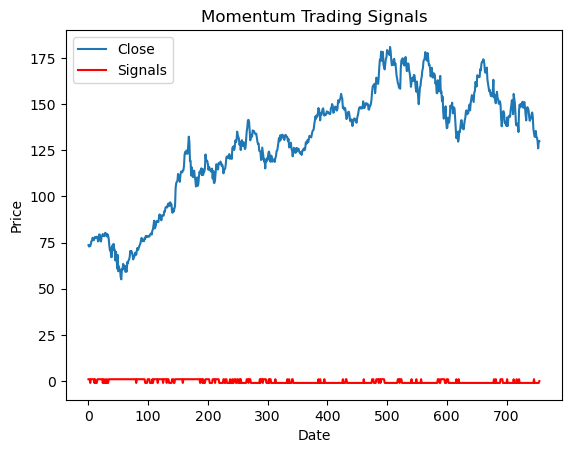

In [28]:
def algo_trading(ticker):
    try:
        df = pd.read_csv(f"{ticker}.csv")
    except:
        getHistoricalData(ticker)
        df = pd.read_csv(f"{ticker}.csv")


    # Use linear regression to fit a model to the data
    x = df[["Open", "High", "Low", "Close", "Volume"]]
    y = df["Close"]
    model = LinearRegression().fit(x, y)


    # Generate trading signals
    signals = generate_model_signals(df, model)
    df["Signals"] = signals
    df["Signals"].to_csv(f"{ticker}_model_signals.csv")
    
    
algo_trading('AAPL')


In [16]:
def test(ticker):
    # Load historical data into a dataframe
    try:
        df = pd.read_csv(f"{ticker}.csv")
    except:
        getHistoricalData(ticker)
        df = pd.read_csv(f"{ticker}.csv")

    # Initialize variables for the strategy
    initial_capital = 100000
    positions = pd.read_csv(f"{ticker}_meanrev_signals.csv",usecols="Signals")
    cash = []
    
    print(positions)

    # Iterate through the data and execute trades
    for i in range(len(df)):
        if i == 0:
            cash.append(initial_capital)
        else:

            # Execute trades
            if positions[i] == 1:
                cash.append(cash[i-1] - df['Open'][i])
            elif positions[i] == -1:
                cash.append(cash[i-1] + df['Open'][i])
            else:
                cash.append(cash[i-1])

    # Add the cash and position values to the dataframe
    df['Positions'] = positions
    df['Cash'] = cash

    # Calculate the total value of the portfolio
    df['Total'] = df['Cash'] + df['Open'] * df['Positions']

    # Plot the portfolio value over time
    import matplotlib.pyplot as plt
    plt.plot(df['Total'])
    plt.show()
    
    
test('BBY')

                                Open       High        Low      Close  \
Date                                                                    
2020-01-02 00:00:00-05:00  78.396641  78.440990  77.128316  77.438744   
2020-01-03 00:00:00-05:00  76.338936  77.731432  76.197030  77.323441   
2020-01-06 00:00:00-05:00  76.693721  77.979781  76.498593  77.970917   
2020-01-07 00:00:00-05:00  77.864478  79.123931  77.571786  78.414383   
2020-01-08 00:00:00-05:00  78.237002  79.265856  77.926575  78.627258   

                            Volume  Dividends  Stock Splits  
Date                                                         
2020-01-02 00:00:00-05:00  2447500        0.0           0.0  
2020-01-03 00:00:00-05:00  1713600        0.0           0.0  
2020-01-06 00:00:00-05:00  2270100        0.0           0.0  
2020-01-07 00:00:00-05:00  2040900        0.0           0.0  
2020-01-08 00:00:00-05:00  2047000        0.0           0.0  


NameError: name 'read_csv' is not defined